## Segmentación de Clientes de un Supermercado


#### Objetivo

El objetivo del presente trabajo es segmentar a los clientes de un supermercado en un número reducido de grupos, esto a partir de información obtenida a través de las tarjetas de membresía. 

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Datos

El conjutno de datos proviene de Kaggle bajo el nombre de "Customer Clustering", el cual fue subido por Dev Sharma. Este cuenta con 2000 observaciones. Los atributos son los siguientes:

ID: Numérico. Entero que muestra una identificación única de un cliente.

Sex (género biológico): Categórico {0,1}. En este conjunto de datos solo hay 2 opciones diferentes: 0 = masculino, 1 = femenino.

Marital Status (estado civil): Categórico {0,1}. Estado civil de un cliente. 0 = soltero, 1 = no soltero (divorciado / separado / casado / viudo).

Age (edad): Numérico, Entero. La edad del cliente en años, calculada como el año actual menos el año de nacimiento del cliente en el momento de la creación del conjunto de datos. 18 es el valor mínimo (la edad más baja observada en el conjunto de datos). 76 es el valor máximo (la edad más alta observada en el conjunto de datos).

Education (educación): Categórico {0,1,2,3}. Nivel de educación del cliente: 0 = otro / desconocido, 1 = escuela secundaria, 2 = universidad, 3 = escuela de posgrado.
Income (ingresos): Numérico, Real. Ingresos anuales autoreportados en dólares estadounidenses del cliente.

Occupation (ocupación): Categórico {0,1,2}. Categoría de ocupación del cliente. 0 = desempleado / no calificado, 1 = empleado calificado / funcionario, 2 = gestión / autónomo / empleado altamente calificado / oficial.

Settlement sieze (Tamaño del lugar de residencia): Categórico {0,1,2}. El tamaño de la ciudad en la que vive el cliente. 0 = ciudad pequeña, 1 = ciudad mediana, 2 = gran ciudad.

Para más información, consultar en la carpeta referencias.

#### Exploración inicial de datos

Se procederá a cargar los datos y realizar una exploración preliminar para tener una noción de las características del conjunto de datos.

In [38]:
data_path = os.path.join(os.getcwd(), '../data/segmentation data.csv')
df = pd.read_csv(data_path)

In [39]:
# Nombres de columnas y datatypes
df.dtypes.to_frame().T

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,int64,int64,int64,int64,int64,int64,int64,int64


In [40]:
# Viendo un subconjunto de los datos
df.head(3)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0


Antes de continuar, es necesario ver si existen datos faltantes y, en dicho caso, implementar estrategias para lidiar con ellos.

In [41]:
# Revisando datos faltantes
df.isnull().sum().to_frame().T

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0,0,0,0,0,0


En este caso, no existen datos faltantes por lo que se puede proceder en el análisis.

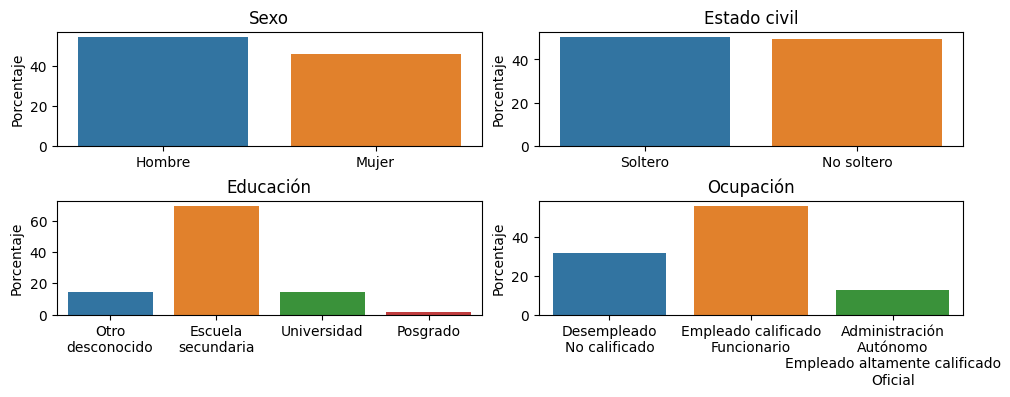

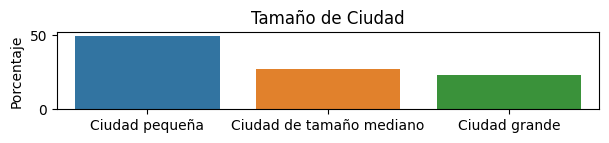

In [42]:
#Gráficos de datos categóricos, 5 variables:
#fig, ((ax1,ax2), ax3, (ax4,ax5)) = plt.subplots(ncols=2, nrows=3, figsize=(15,5))
fig = plt.figure(figsize=(10, 5), constrained_layout=True)

#Sexo
ax0 = fig.add_subplot(3,2,1)
counts = df['Sex'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax0)
ax0.set_xticklabels(['Hombre', 'Mujer'], rotation=0)
ax0.set_ylabel("Porcentaje")
ax0.set_title('Sexo')

#Estado civil
ax1 = fig.add_subplot(3,2,2)
counts = df['Marital status'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax1)
ax1.set_xticklabels(['Soltero', 'No soltero'], rotation=0)
ax1.set_ylabel("Porcentaje")
ax1.set_title('Estado civil')

#Educación
ax2 = fig.add_subplot(3,2,3)
counts = df['Education'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax2)
ax2.set_xticklabels(['Otro\ndesconocido', 'Escuela\nsecundaria',
'Universidad', 'Posgrado'], rotation=0)
ax2.set_ylabel("Porcentaje")
ax2.set_title('Educación')

#Ocupación
ax3 = fig.add_subplot(3,2,4)
counts = df['Occupation'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
y=counts, ax=ax3)
ax3.set_xticklabels(['Desempleado\nNo calificado', 'Empleado calificado\nFuncionario',
'Administración\nAutónomo\nEmpleado altamente calificado\nOficial'], rotation=0)
ax3.set_ylabel("Porcentaje")
ax3.set_title('Ocupación')

plt.show()

#Tamaño de asentamiento
fig2 = plt.figure(figsize=(7, 1))
ax4 = fig2.add_subplot(1,1,1)
counts = df['Settlement size'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
y=counts, ax=ax4)
ax4.set_xticklabels(['Ciudad pequeña', 'Ciudad de tamaño mediano',
'Ciudad grande'], rotation=0)
ax4.set_ylabel("Porcentaje")
ax4.set_title('Tamaño de Ciudad')
#plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=10, hspace=None)

plt.show()

Se puede observar que en cuanto al género y estado civil, los clientes están distribuidos de manera equitativa entre las categorías. Además, la mayoría de los clientes tienen educación secundaria y son empleados cualificados. Finalmente, casi la mitad de ellos provienen de una ciudad pequeña, probablemente debido a la ubicación de los supermercados.

Text(0.5, 1.0, 'Ingreso')

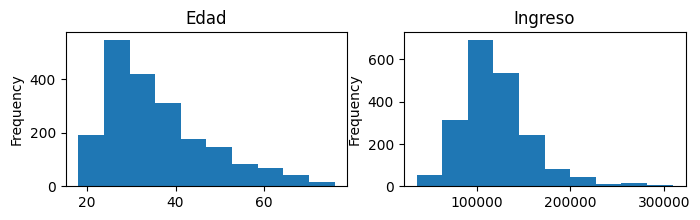

In [43]:
# Gráficos de datos cuantitativos
fig = plt.figure(figsize=(8,2))

ax0 = fig.add_subplot(1,2,1)
df.Age.plot.hist(ax=ax0)
ax0.set_title('Edad')

ax1 = fig.add_subplot(1,2,2)
df.Income.plot.hist(ax=ax1)
ax1.set_title('Ingreso')

Se puede observar que la mayoria de los clientes se encuentra entre los 20 y 60 años y tienen ingresos medio-altos.

También, se puede visualizar las correlaciones entre las variables numéricas y ordinales. Para ambos casos se usa correlación de Spearman.

In [44]:
# dropping ID
#df = df.drop('ID', axis=1)

# Exploring correlations
df_numeric = df.drop(['Sex', 'Marital status'], axis=1)
corr = df_numeric.corr(method='spearman')
corr

,ID,Age,Education,Income,Occupation,Settlement size
ID,1.000000,-0.075017,0.011457,-0.321257,-0.296935,-0.388099
Age,-0.075017,1.000000,0.585299,0.344604,0.099397,0.123912
Education,0.011457,0.585299,1.000000,0.224328,0.050204,0.033585
Income,-0.321257,0.344604,0.224328,1.000000,0.687178,0.537210
Occupation,-0.296935,0.099397,0.050204,0.687178,1.000000,0.595971
Settlement size,-0.388099,0.123912,0.033585,0.537210,0.595971,1.000000


<AxesSubplot: >

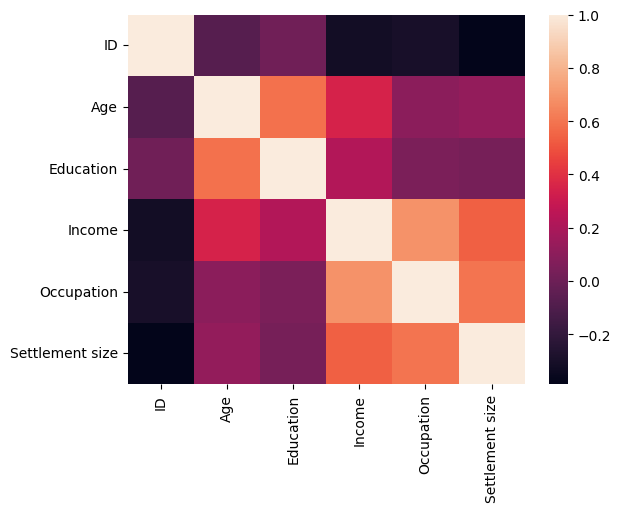

In [45]:
#And visualizing
sns.heatmap(corr)

Se puede ver una alta correlación entre ingresos y ocupación, considerando esta última como variable ordinal.

Finalmente, se imprime un resumen de las estadísticas más relevantes de las variables

In [46]:
#some statistics of continuous and ordinal data
df_numeric.describe()

,ID,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,76.000000,3.00000,309364.000000,2.000000,2.000000


#### Construcción de los modelos de agrupamiento

Tres algoritmos de agrupamiento distintos fueron implementados: K-means, HDBSCAN y Gaussian Mixture Model. En cada caso,  se determinaron los mejores hiper-parámetros. Se utilizó la biblioteca Scikit-learn para K-means y GMM, mientras que para el algoritmo HDBSCAN se utilizó la implementación provista por la biblioteca hdbscan.

Antes de construir los modelos, es necesario preprocesar los datos.

In [51]:
# Preprocesando los datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_cols = ['Age', 'Income']
ordinal_cols = ['Education', 'Settlement size']
cat_cols = ['Sex', 'Marital status', 'Occupation']

numeric_transformer = Pipeline([('inputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())
                               ])
cat_transformer = Pipeline([('inputer', SimpleImputer(strategy='most_frequent')),
                             ('onehot', OneHotEncoder())
                            ])
ordinal_transformer = Pipeline([('inputer', SimpleImputer(strategy='most_frequent')),
                               ('ord_encod', OrdinalEncoder())
                               ])

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_cols),
                                ('ordinal', ordinal_transformer, ordinal_cols),
                                ('cat', cat_transformer, cat_cols),
                                ])

scaler = preprocessor.fit(df)
X_trans = scaler.transform(df)
df_transf = pd.DataFrame(X).head(2)

In [62]:
# Dando nombre a las columnas
def get_column_names(column_transformer):
  features_names =[]
  for key, value in column_transformer.named_transformers_.items():
    if hasattr(value, 'get_feature_names_out'):
      features = list(value.get_feature_names_out())
      features_names.extend(features)
  return features_names

In [63]:
# Inspeccionando las nuevas columnas
df_transf.columns = get_column_names(preprocessor)
df_transf.head(3)

,Age,Income,Education,Settlement size,Sex_0,Sex_1,Marital status_0,Marital status_1,Occupation_0,Occupation_1,Occupation_2
0,2.653614,0.097524,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.187132,0.782654,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


##### K-means

El primer modelo que se va a implementar para agrupar es K-means. En este algoritmo, el número de grupos (clusters) es un hiperparámetro a elegir. Además, no es un algoritmo determinista, por lo que cada vez que se inicie, el resultado será diferente.

Para determinar el numero de grupos (clusters), se usará el método del codo (elbow curve) junto con la métrica silueta (silhouette score). El primero consiste en calcular la inercia, el cual nos da una medida de que tan lejos se encuentran los puntos del centro del grupo (cluster), para distintos números de grupos. Una vez calculados, se los gráfica y se busca un cambió abrupto en la curva, el codo. Es este punto el que da el número de grupos óptimo. El segundo, la silueta, es una métrica que mide que tan similares son los puntos dentro de un grupo y que tan disimilares son los mismos respecto a otros puntos en otros grupos. En este caso, valores bajos y valores altos del número de grupos darán inevitablemente valores altos, por lo que se descartan. Lo que se busca es el número de grupos con el mayor valor de la silueta más próximo al valor dado por el método del codo.

Es necesario hacer notar que debido a la naturaleza no determinista del algoritmo, para calcular cada métrica, inerica y silueta, es necesario promediar varias inicializaciones del algoritmo. En este caso se promedia en base a 10 ejecuciones del mismo.

In [66]:
from sklearn.cluster import KMeans
import numpy as np

inertias = []
for i in range(1, 10):
    #averaging multiple runs
    score = []
    for j in range(10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        score.append(kmeans.inertia_)
    inertias.append(np.average(np.array(score)))

Text(0.5, 0, 'Number of Clusters')

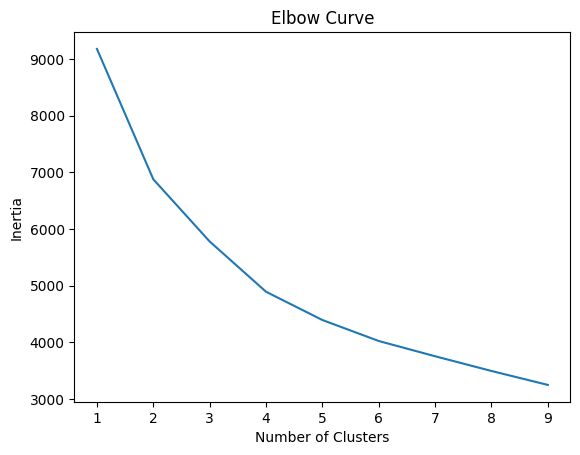

In [20]:
#plot the elbow curve
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,10), inertias)
ax.set_title('Elbow Curve')
ax.set_ylabel('Inertia')
ax.set_xlabel('Number of Clusters')


In [19]:
# Using the silhouette method
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for i in range(2, 10):
    #averaging multiple runs
    score = []
    for j in range(10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        score.append(silhouette_score(X, kmeans.labels_ , metric='euclidean'))
    silhouette_scores.append(np.average(np.array(score)))

Text(0.5, 0, 'Number of Clusters')

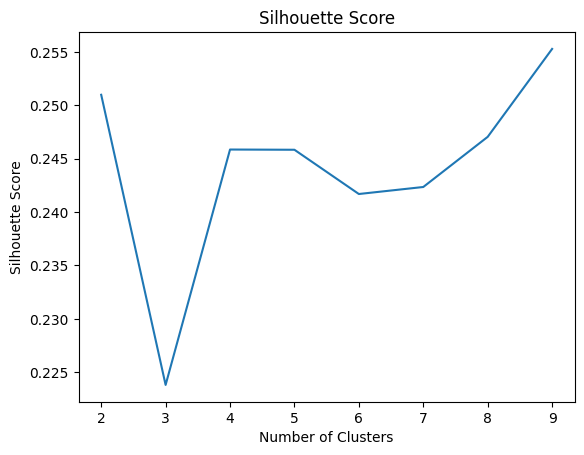

In [196]:
#plot the silhouette_score
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(2,10), silhouette_scores)
ax.set_title('Silhouette Score')
ax.set_ylabel('Silhouette Score')
ax.set_xlabel('Number of Clusters')

Del método del codo no queda muy claro donde se encuentra dicho codo, sin embargo, la métrica de la silueta ayuda a determinarlo. El número óptimo de grupos es cuatro.

In [67]:
# K = 4 is the value to be chosen
k = 4

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=4)

Se calcula el promedio de la métrica de la siulueta, com este número de grupos, para poder comparar su desempeño respecto a los otros algoritmos.

In [69]:
from sklearn.metrics import silhouette_score
score = []
for j in range(10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(silhouette_score(X, kmeans.labels_ , metric='euclidean'))
scoreKmeans_silh = np.average(np.array(score))
scoreKmeans_silh

0.24581431955464628

Es necesario hacer una inspección visual del resultado de la agrupación.

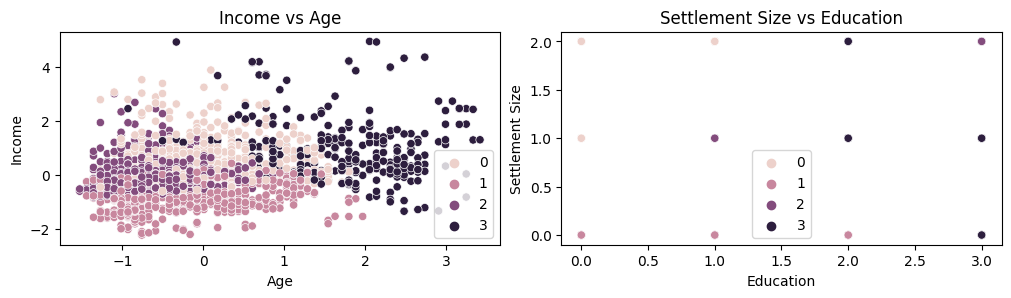

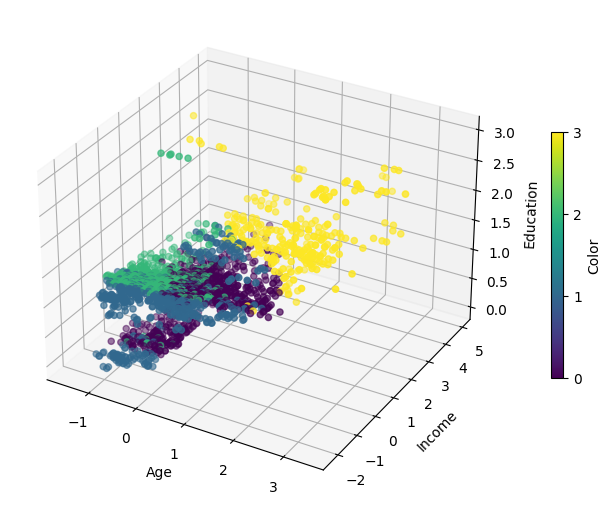

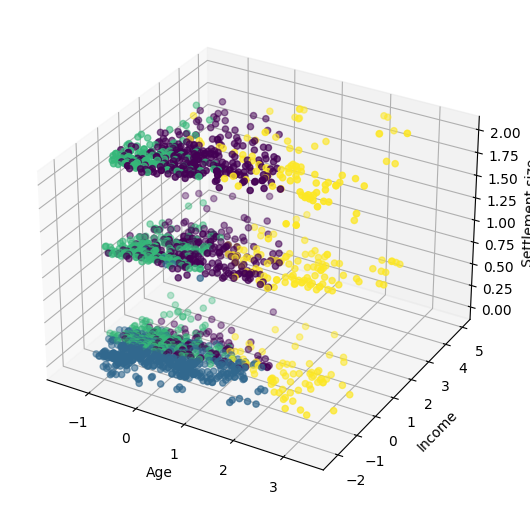

In [70]:
# Visualize the clusters, one run
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=kmeans.labels_, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

colorbar.set_label('Color')

plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=kmeans.labels_)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Settlement size')


plt.show()

##### HDBSCAN

Ahora, se implementará el algoritmo HDBSCAN. Se usa la libreria hdbscan (McInnes L, Healy J).

Este algoritmo es una mejora del DBSCAN, ya no es necesario escojer el hiperparémetro "epsilon" y, además, puede lidiar con grupos de densidad variada. Esto simplifica mucho el proceso de ajustar el modelo. Tanto en DBSCAN como en HDBSCAN, el número de grupos (clusters) se escoje de forma automática.

In [22]:
#HDBSCAN
# Probando la libreria
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=120, min_samples=20)

clusterer.fit(X)
clusterer.labels_.max()

5

Los hiperparámetros a escoger son min_cluster_size y min_samples. Se hace una búsqueda exhaustiva y se usa la métrica de la silueta para comparar.

In [27]:
score = []
num_clust = []
min_clust = []
min_sample = []
for i in range(2,16,2):
    for j in range(20, 300, 20):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=j, min_samples=i)
        clusterer.fit(X)
        
        score.append(silhouette_score(X, clusterer.labels_))
        num_clust.append(clusterer.labels_.max())
        min_clust.append(j)
        min_sample.append(i)
        #print('min_cluster_size : ', j, '  min_samples : ', i)
        #print('Silhouette score:', silhouette_score(X, clusterer.labels_))
        #print('Number of clusters:', clusterer.labels_.max())
results = pd.DataFrame({'min_cluster_size' : min_clust,
                       'min_samples' : min_sample,
                       'Silhouette score' : score,
                       'Number of clusters' : num_clust})

In [35]:
# ordering
ordered = results.sort_values('Silhouette score', ascending=False)
# ordered[ordered['Number of clusters']==5]
ordered.head(30)

,min_cluster_size,min_samples,Silhouette score,Number of clusters
0,20,2,0.299667,28
28,20,6,0.297056,26
14,20,4,0.295286,28
42,20,8,0.284585,25
56,20,10,0.274246,25
1,40,2,0.260948,18
15,40,4,0.259181,18
29,40,6,0.256796,18
70,20,12,0.256183,24
43,40,8,0.255862,18


Se escoje la combinación con el mayor valor para la silueta pero con un número "reducido" de grupos. La combinación es min_cluster_size = 140 y min_samples = 2, con un número de 5 grupos. 

Se segmenta a los clientes utilizando este algoritmo y luego se inspecciona visualmente el resultado.

Silhouette score: 0.18731734214508705
Number of clusters: 5


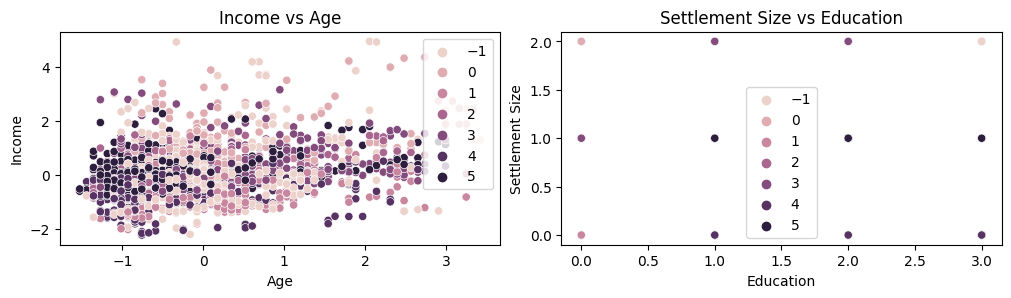

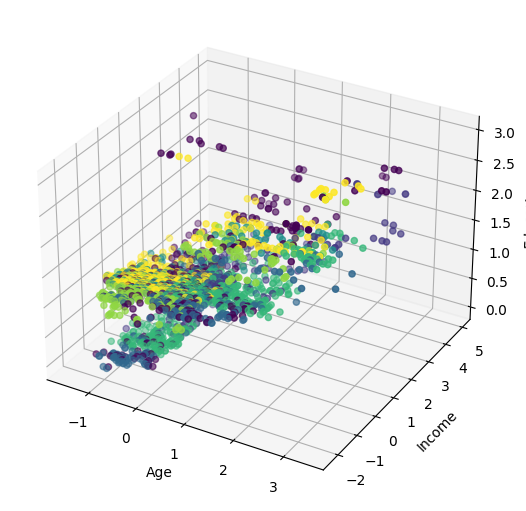

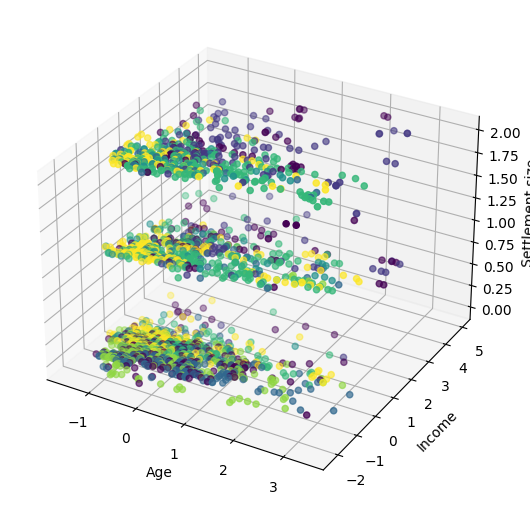

In [74]:
#picking the one with the highest score but a small number of clusters
clusterer = hdbscan.HDBSCAN(min_cluster_size=140, min_samples=2)

clusterer.fit(X)

print('Silhouette score:', silhouette_score(X, clusterer.labels_))
print('Number of clusters:', clusterer.labels_.max())

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

labels = clusterer.labels_

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=labels, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=labels)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Settlement size')


plt.show()

La forma de agrupar es diferente a la dada por K-means.
Finalmente, se explora el número de puntos por grupo.

In [40]:
# Exploring the labels
pd.DataFrame(clusterer.labels_).value_counts()

 3    465
 5    430
-1    293
 1    266
 4    244
 0    151
 2    151
dtype: int64

Se ve que qedaron 293 puntos sin clasificar.

##### Gaussian Mixture Model

Finalmente, el algoritmo GMM es usado para agrupar los datos. A diferencia de los anteriores dos, este es un algoritmo que entrega un aprobabilidad de que cada punto pertenezca a un determinado grupo. Esto implica que cada punto tiene asociada una probabilidad por cada grupo. GMM asume que los datos son generados por una mezcla de varias distribuciones Gaussianas, donde cada componente representa un modo distinto en la distribución de los datos.

Los hiperparametros a escoger son: n_components y covariance_type. Se usa grid-search con la métrica BIC para escogerlos. BIC (Bayesian Information Criterion) es una métrica que mide el balance entre la complejidad del modelo y que tan bien este se ajusta a los datos.

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x00000277B64A9440>)

Ahora, es necesario evaluar los resultados para las diferentes combinaciones de los hiperparámetros. Será necesario graficar.

In [68]:

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]

#Back to the original sign
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
9,4,tied,-16863.496651
11,6,tied,-16828.176773
10,5,tied,-16687.196795
20,3,full,-15429.298321
19,2,full,-12675.291636


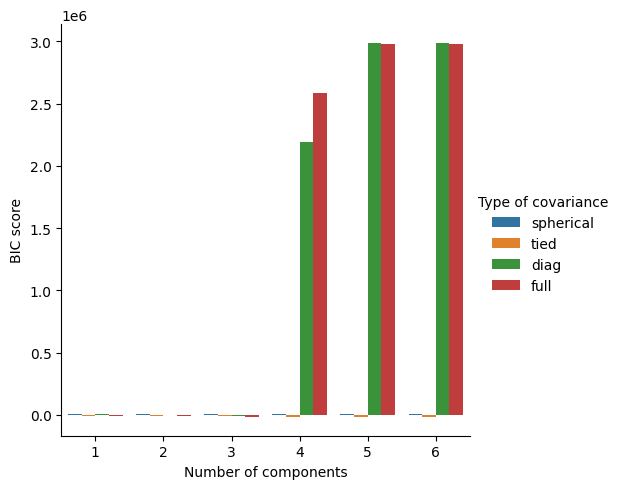

In [89]:
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

Es necesario suprimir los valores muy elevados para efectuar una correcta evaluación.

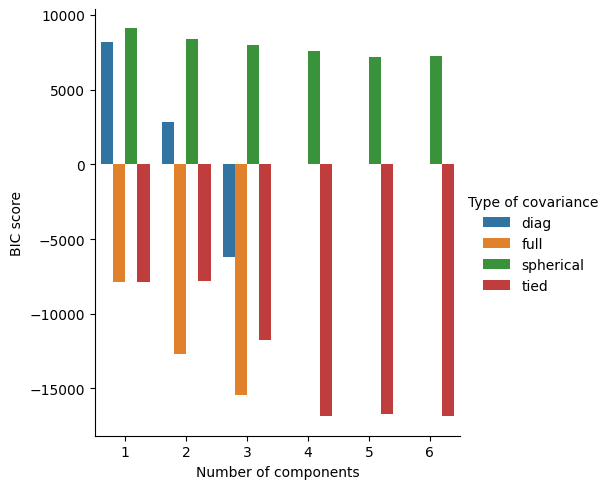

In [121]:
#supressing high values for visualization purpuses
df_lower_values = pd.DataFrame(df.groupby(["Number of components", "Type of covariance"]).value_counts())
df_lower_values = df_lower_values.drop(index=[(4, 'full'), (4, 'diag'), (5, 'full'), (5, 'diag'), (6, 'full'), (6, 'diag')])
df_lower_values = df_lower_values.reset_index(level=[0,1])
df_lower_values = df_lower_values.reset_index()

sns.catplot(
    data=df_lower_values,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

Cuatro grupos con covarianza "tied" es el que mejor se desempeña. En la métrica BIC, mientras menor es el valor, mejor.

Se repetirá el proceso, pero ahora con una métrica diferente, la silueta.

In [76]:
#Trying a different approach
score = []
num_clust = []
covariance_type = []
n_components = []
for i in range(2, 7):
    for j in ["spherical", "tied", "diag", "full"]:
        clusterer = GaussianMixture(n_components=i, covariance_type=j)
        clusterer.fit(X)
        
        score.append(silhouette_score(X, clusterer.predict(X)))
        num_clust.append(clusterer.predict(X).max())
        covariance_type.append(j)
        n_components.append(i)
        #print('min_cluster_size : ', j, '  min_samples : ', i)
        #print('Silhouette score:', silhouette_score(X, clusterer.labels_))
        #print('Number of clusters:', clusterer.labels_.max())
results = pd.DataFrame({'covariance_type' : covariance_type,
                       'n_components' : n_components,
                       'Silhouette score' : score,
                       'Number of clusters' : num_clust})
results.head()

,covariance_type,n_components,Silhouette score,Number of clusters
0,spherical,2,0.240794,1
1,tied,2,0.225839,1
2,diag,2,0.212145,1
3,full,2,0.233361,1
4,spherical,3,0.200870,2


In [78]:
#ordering
ordered = results.sort_values('Silhouette score', ascending=False)
#ordered[ordered['Number of clusters']==5]
ordered.reset_index().head(30)
#pd.DataFrame(ordered.groupby(["n_components", "covariance_type"]).value_counts())

,index,covariance_type,n_components,Silhouette score,Number of clusters
0,0,spherical,2,0.240794,1
1,3,full,2,0.233361,1
2,1,tied,2,0.225839,1
3,10,diag,4,0.221982,3
4,18,diag,6,0.219150,5
5,12,spherical,5,0.216494,4
6,14,diag,5,0.215411,4
7,19,full,6,0.214649,5
8,2,diag,2,0.212145,1
9,16,spherical,6,0.203272,5


Si no tomamos en cuenta las opciones con solo dos grupos ni tampoco las opciones con la métrica BIC con valores muy altos, queda n_components igual a 5 (5 grupos) y covarianza esférica.

In [84]:
from sklearn.mixture import GaussianMixture
clusterer = GaussianMixture(n_components=5, covariance_type='spherical')

clusterer.fit(X)

GaussianMixture(covariance_type='spherical', n_components=5)

Silhouette score: 0.21649400145325143
Number of clusters: 5


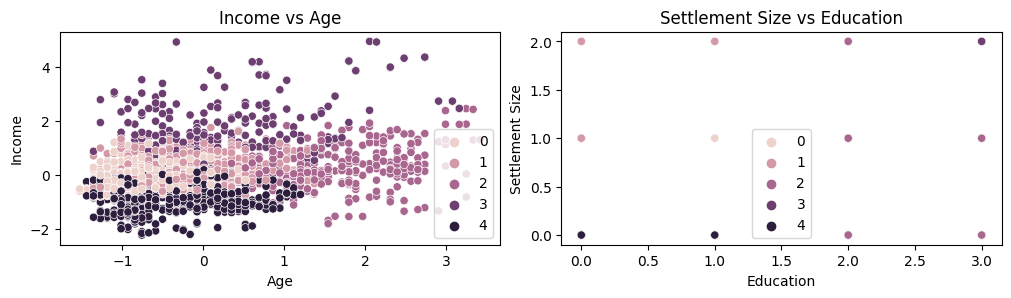

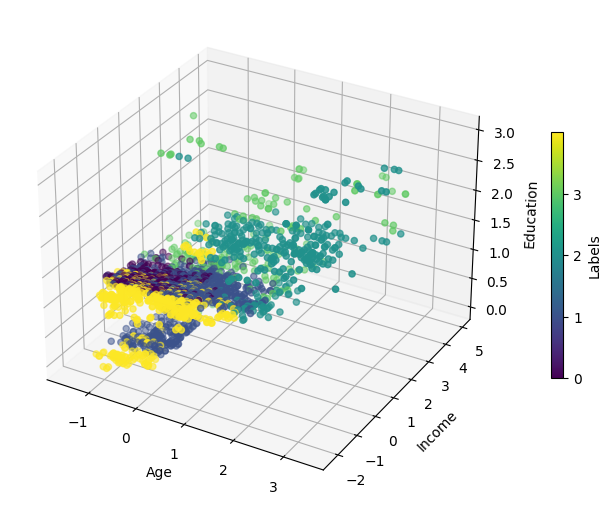

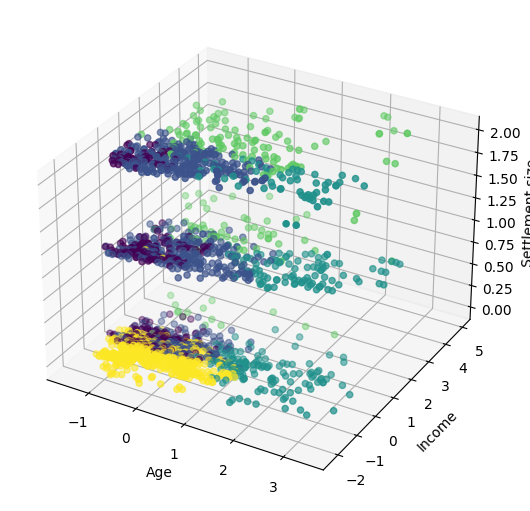

In [86]:
#visualizing labels

clusterer = GaussianMixture(n_components=5, covariance_type='spherical')

clusterer.fit(X)

print('Silhouette score:', silhouette_score(X, clusterer.predict(X)))
print('Number of clusters:', clusterer.predict(X).max() + 1) # Starts from 0

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

labels = clusterer.predict(X)

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=labels, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

colorbar.set_label('Labels')

plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=labels)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Settlement size')


plt.show()

##### Selección del Modelo

Para escoger el modelo, se procede a compararlos usando la métrica de la silueta.

In [87]:
#Now the comparison between the three algorithms to pick the optimal one.
data = {'Algorithm': ['K-Means', 'HDBSCAN', 'GMM'],
        'Silhouette_score': [0.24584651531810206, 0.18731734214508705, 0.2164],
        'Number_of_clusters': [4, 6, 4]}
df_scores = pd.DataFrame(data)
df_scores

,Algorithm,Silhouette_score,Number_of_clusters
0,K-Means,0.245847,4
1,HDBSCAN,0.187317,6
2,GMM,0.216400,4


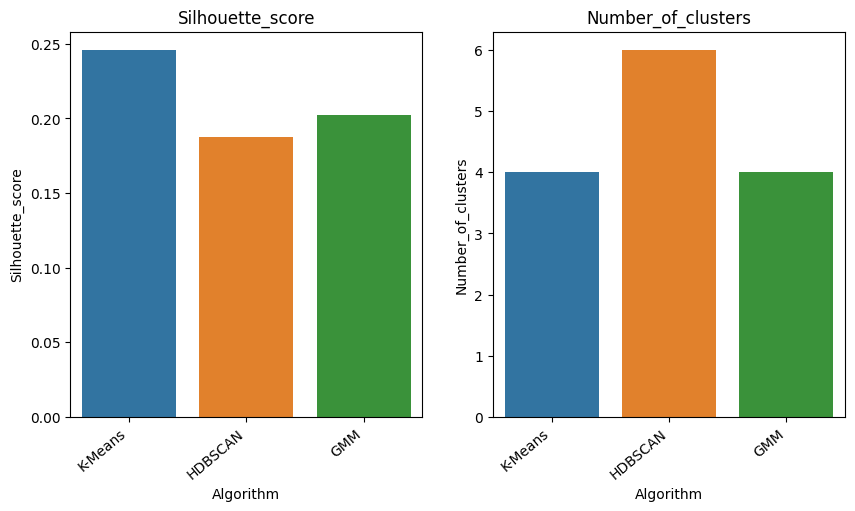

In [26]:
# create two plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='Algorithm', y='Silhouette_score', ax=ax1, data=df_scores)
sns.barplot(x='Algorithm', y='Number_of_clusters', ax=ax2, data=df_scores)

# set titles for plots
ax1.set_title("Silhouette_score")
ax2.set_title("Number_of_clusters")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

# display the plots
plt.show()

De la anterior gráfica, se escoje el algoritmo K-mean con K=4, cuatro grupos. Su desempeño es bueno y tiene un "reducido" número de grupos.

In [88]:
#Training the final algorithm

from sklearn.metrics import silhouette_score
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_ , metric='euclidean')

0.2459270047267415

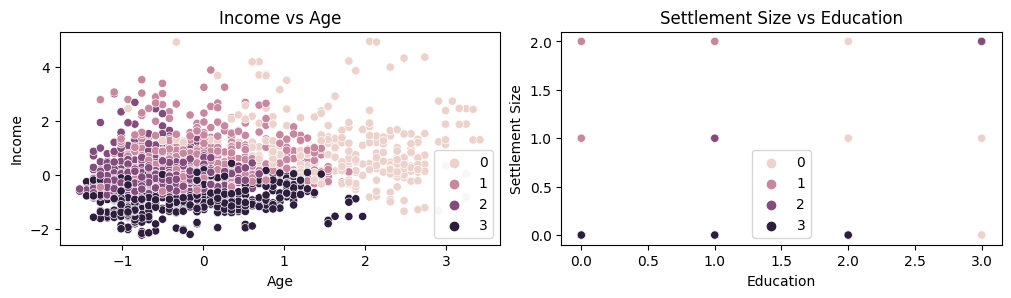

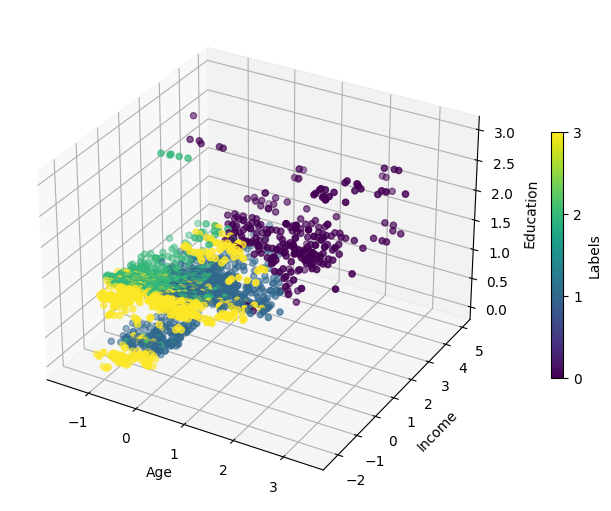

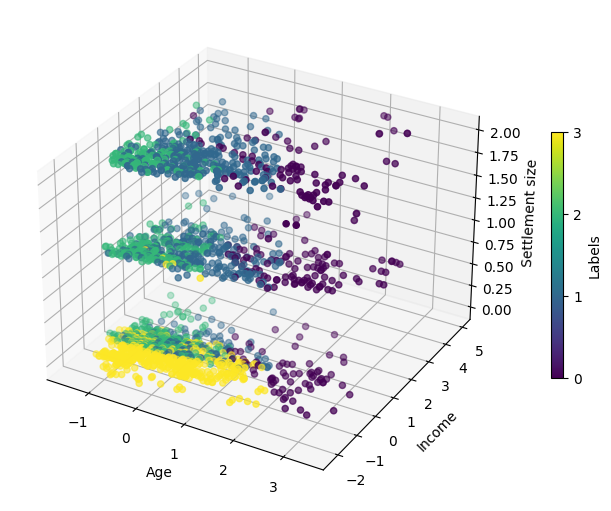

In [89]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.predict(X)

fig = plt.figure(figsize=(10, 5), constrained_layout=True)

ax0 = fig.add_subplot(2,2,1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, ax = ax0)
ax0.set_xlabel('Age')
ax0.set_ylabel('Income')
ax0.set_title('Income vs Age')

ax1 = fig.add_subplot(2,2,2)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=kmeans.labels_, ax = ax1)
ax1.set_xlabel('Education')
ax1.set_ylabel('Settlement Size')
ax1.set_title('Settlement Size vs Education')
plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Education')

colorbar.set_label('Labels')

plt.show()

fig = plt.figure(figsize=(11, 5), constrained_layout=True)

ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 3], c=kmeans.labels_)
colorbar = fig.colorbar(scatter, ax=ax2, ticks = [0,1,2,3], shrink=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Income')
ax2.set_zlabel('Settlement size')

colorbar.set_label('Labels')

plt.show()

Finalmente, se añaden las nueva estiquetas al los datos originales en una nueva columna. Esto como punto de partida para una descripción cualitativa de los nuevos grupos.

In [91]:
#adding the labels to the original dataset
df_noID = df.drop('ID', axis=1)
df_labels = df_noID.copy() 
df_labels['Labels'] = kmeans.labels_
df_labels.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Labels'],
      dtype='object')

Si imprimimos los datos, se puede constatar de forma visual que los clientes fueron segmentados de una forma consistente.

In [38]:
#We can see that the customers have been segmentated in a consistent way
df_all = pd.DataFrame(df_labels.groupby(['Education', 'Occupation']).value_counts())
print(df_all.to_string())

                                                                           0
Education Occupation Sex Marital status Age Income Settlement size Labels   
0         0          0   0              21  59127  0               1       1
                                            59255  0               1       1
                     1   0              26  64860  0               1       1
                                        33  69523  0               1       1
                                        32  81907  0               1       1
                                            68347  0               1       1
                                        31  76384  0               1       1
                                            72361  0               1       1
                                        30  88652  0               1       1
                                        29  85637  0               1       1
                                            80852  0               1       1